# Human Resources Data Set

## Source: https://www.kaggle.com/rhuebner/human-resources-data-set 

### Synopsis

### Introduction:
This is a **fictitious** data set designed to allow the exploration of human resource (*HR*) metric data. I chose this data set because I feel HR data provides compelling questions data science can help answer, like: ***What are some strategies we could implement to improve employee productivity?*** ***Which teams are really working best together?*** ***How do we target our high impact employees?*** ***How much should we be paying our employees, really?*** , to name just a few.

In this report I focus primarily on the company's ***pay*** distribution and evaluate it against these other variables: ***sex***, ***age***, ***performance score***, and ***position***, to explore whether or not there are meaningful relationships.  

### Problems: 
Due to the **fictitious** nature of this data set there are inherent biases. Those biases are baked into the data set. Even though this is training data and would most certainly be a small sample size and **shouldn't** be used to make statistical judgements to be applied to other companies, the ***data science*** techniques used here, and the ***insights*** gained here can be beneficial for future work. Knowing **how** to look for, and having clues about **what** to look for, can be beneficial when explorting a more robust and *"wild"* data set. 

I needed to rename the columns in *lower case* and *snake_case*, and add a row of data in order to properly use the ***slicing***, ***groupby***, and ***plotting*** techniques learned along the way.

### Data Description:
The imported data was in .csv format. The data set contains 28 columns. Cells In cells ***2-8*** I'm prepping the data for analysis. My analyses starts in cell ***9***.


In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:\\HRdataset_v9.csv')
df.head(0)


,Employee Name,Employee Number,MarriedID,MaritalStatusID,GenderID,EmpStatus_ID,DeptID,Perf_ScoreID,Age,Pay Rate,...,Date of Hire,Days Employed,Date of Termination,Reason For Term,Employment Status,Department,Position,Manager Name,Employee Source,Performance Score


In [3]:
df.rename(str.lower, axis = 'columns', inplace = True) 
df.head(0)

,employee name,employee number,marriedid,maritalstatusid,genderid,empstatus_id,deptid,perf_scoreid,age,pay rate,...,date of hire,days employed,date of termination,reason for term,employment status,department,position,manager name,employee source,performance score


In [4]:
df.rename(columns= {'employee name':'employee_name', 'employee number': 'employee_number', 'pay rate':'pay_rate',
         'date of hire': 'date_of_hire','days employed':'days_employed', 'date of termination': 'date_of_termination',
         'reason for term': 'reason_for_term', 'employment status': 'employment_status', 'manager name':'manager_name',
         'employee source': 'employee_source', 'performance score': 'performance_score'}, inplace=True)
df.head(0)

,employee_name,employee_number,marriedid,maritalstatusid,genderid,empstatus_id,deptid,perf_scoreid,age,pay_rate,...,date_of_hire,days_employed,date_of_termination,reason_for_term,employment_status,department,position,manager_name,employee_source,performance_score


In [5]:
df.rename(index=str, columns={'performance_score':'performance_review'}, inplace =True)
df.head(0)

,employee_name,employee_number,marriedid,maritalstatusid,genderid,empstatus_id,deptid,perf_scoreid,age,pay_rate,...,date_of_hire,days_employed,date_of_termination,reason_for_term,employment_status,department,position,manager_name,employee_source,performance_review


In [6]:
df['performance_review'].replace({'Fully Meets':'fully_meets','90-day meets':'fully_meets',
                                  'N/A- too early to review':'too_early_to_review',
                                  'Exceptional':'exceptional','Needs improvement':'needs_improvement',
                                  'Exceeds':'exceeds'}, inplace = True)


In [7]:
df['performance_score'] = df.performance_review.map({'PIP':-1, 'needs_improvement': 1, 'too_early_to_review':0, 
                                                     'fully_meets': 3, 'exceeds': 4, 'exceptional': 5})

In [8]:
df.performance_score = df.performance_score.astype(float)

In [9]:
hr_data = df

In [10]:
hr_data.head(0)

,employee_name,employee_number,marriedid,maritalstatusid,genderid,empstatus_id,deptid,perf_scoreid,age,pay_rate,...,days_employed,date_of_termination,reason_for_term,employment_status,department,position,manager_name,employee_source,performance_review,performance_score


### ***Question 1: What is the sex demographic of the 20 highest paid employees at the company?***

Let's take a look at who our ***top*** 20 earners are by using ***< .loc >*** and the column names to isolate the information we want.

In [11]:
hr_data.loc[:,['employee_name','position','pay_rate', 'sex']].nlargest(20, 'pay_rate')

,employee_name,position,pay_rate,sex
10,"King, Janet",President & CEO,80.00,Female
11,"Zamora, Jennifer",CIO,65.00,Female
25,"Foss, Jason",IT Director,65.00,Male
29,"Dougall, Eric",IT Manager - Support,64.00,Male
301,"Champaigne, Brian",BI Director,63.50,Male
28,"Monroe, Peter",IT Manager - Infra,63.00,Male
26,"Roup,Simon",IT Manager - DB,62.00,Male
43,"Ait Sidi, Karthikeyan",Sr. DBA,62.00,Male
44,"Carr, Claudia N",Sr. DBA,61.30,Female
289,"Kampew, Donysha",Sales Manager,60.25,Female


**Viola!** A summary of the information we requested, we can explore characteristics about the top 20 earners by adding columns to our search. Nevertheless, it doesn't really answer our question, directly.  A chart would really help, and because we want to know about only two parts of a whole top 20 earners by sex I chose a **pie chart**. 

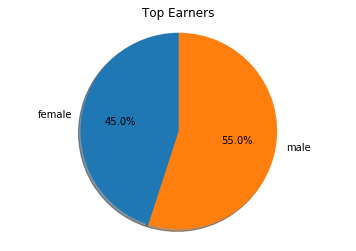

In [12]:

labels= 'female', 'male'
sizes = [9,11]
fig1, ax1 =plt.subplots()
ax1.pie(sizes,labels=labels,autopct='%1.1f%%', shadow= True, startangle=90)
ax1.axis('equal')
plt.title('Top Earners')
plt.show()

There, that's ***much*** better. With just a **quick** glance we can see the sex demographic of our top 20 earners. We can conclude that at this company, at the time the data was created, there was ***no*** parity in pay between women and men. If you reference the chart above however, you will see women do hold very important leadership positions in this company.

### ***Question 2: Is there a relationship between the Pay and Age distributions at the company?***


In order to answer this question I wanted to illustrate, and compare the distributions of ***pay*** and ***age***. If they were both ***normal***, there may have been some similarity to look into. In order to do this, I chose to use histograms and subplots to show the distributions side by side. Let's take a look.

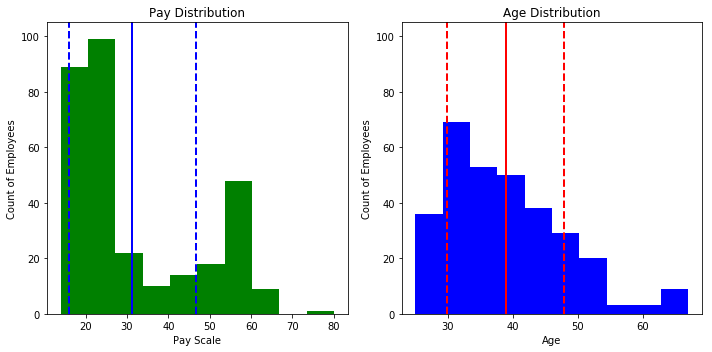

In [13]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.hist(hr_data['pay_rate'], color ='green')
plt.ylim([0,105])
plt.axvline(x= 31.284806, color = 'b',linestyle='solid',linewidth=2)
plt.axvline(x= 31.284806 + 15.383615, color = 'b', linestyle='dashed',linewidth=2)
plt.axvline(x= 31.284806 - 15.383615, color = 'b', linestyle='dashed',linewidth=2)
plt.xlabel('Pay Scale')
plt.ylabel('Count of Employees')
plt.title('Pay Distribution')

plt.subplot(1,2,2)
plt.hist(hr_data['age'], color ='blue')
plt.ylim([0,105])
plt.axvline(x= 38.867742, color = 'r',linestyle='solid',linewidth=2)
plt.axvline(x= 38.867742 + 8.922459, color = 'r', linestyle='dashed',linewidth=2)
plt.axvline(x= 38.867742 - 8.922459, color = 'r', linestyle='dashed',linewidth=2)
plt.xlabel('Age')
plt.ylabel('Count of Employees')
plt.title('Age Distribution')


plt.tight_layout()
plt.show()

*Hmm*, the distributions definitely do not look similar. The mean and standard deviation (*std*) have been inserted into each chart. ***Age*** and ***Pay*** do not appear to be directly related, though they *may* have a shared characteristic in common.

Let's check the variance and the mode of ***age*** and ***pay_rate***.

In [14]:
hr_data['pay_rate'].var()

236.65561921808126

In [15]:
hr_data['pay_rate'].mode()

0    22.0
1    55.0
dtype: float64

In [16]:
hr_data['age'].var()

79.61028291053346

In [17]:
hr_data['age'].mode()

0    31
dtype: int64

We can gather an idea of the modes from the histograms, but now with the **< hr_data.mode() >** command we can get specfics. The variance seems **high** for both features, **but** the **lack** of correlation between the two features doesn't allow  us to determine too much by comparing their variances.
 
There is an **interesting** spike in 'Pay Distribution' between $ 55 - 60 $, approximately. Let's take a look.

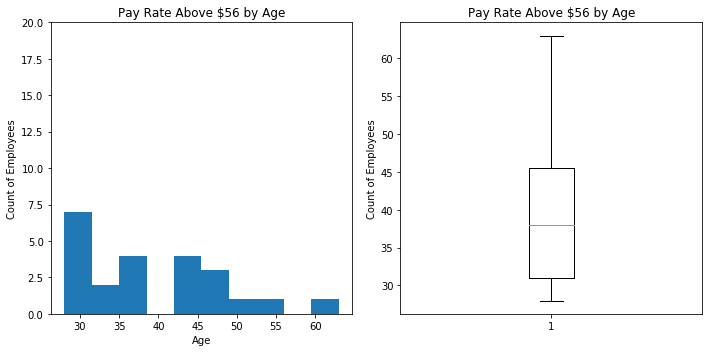

In [18]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.ylim([0,20])
plt.hist(hr_data[hr_data['pay_rate']>=56]['age'])
plt.xlabel('Age')
plt.ylabel('Count of Employees')
plt.title('Pay Rate Above $56 by Age')

plt.subplot(1,2,2)
plt.boxplot(hr_data[hr_data['pay_rate']>=56]['age'])
plt.title('Pay Rate Above $56 by Age')
plt.ylabel('Count of Employees')
plt.tight_layout()
plt.show()

Suprisingly, the pay rate 'spike' contains a fairly wide range of ages, in my opinion. I specifically chose the **boxplot** to show what the distribution of ages was like for those earning $56 or more, there is only one substantial outlier. **Overall**, it is ***less*** skewed than I thought it would be, based on the indpendent Pay rate and Age histograms.

Now that we've explored the relationship between age and pay without finding a definitive relationship, let's explore whether or not a relationship exist between ***performance_score*** and ***pay_rate***.

### ***Question 3: Do individuals with higher performance scores also have higher pay rates?***

There are only a handful of performance scores so let's use another pie chart to evaluate the difference between pay rates grouped by performance scores.

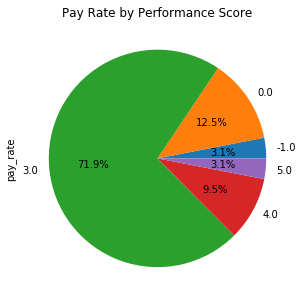

In [19]:
plt.figure(figsize=(10,5))
hr_data.groupby('performance_score').pay_rate.count().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pay Rate by Performance Score')
plt.show()

The two **'high'** performance_scores, scores four and five, only combine to a total of $12.6%$ of the work force. It appears performance score and pay rate are independent.

Let's try something else, let's look at the variance of ***pay_rate*** when the data is grouped by ***performance_score***.

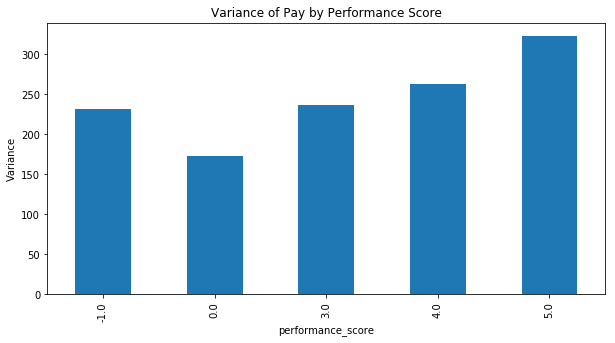

In [20]:
plt.figure(figsize=(10,5))
hr_data.groupby('performance_score').pay_rate.var().plot(kind = 'bar', x ='performance_score')
plt.title('Variance of Pay by Performance Score')
plt.ylabel('Variance')
plt.show()

**Well** that confirms it, performance_score has no **apparent** impact on pay. The variance within the groups are still really high.

We've explored relationships between ***pay_rate*** and ***sex***,***age***,and ***performance_score***, without finding anything too conclusive. But, before we go, let's try **one more thing**. Do you remember the Pay Distribution 
graph from before? Let's take a look at it again compared to a historgram of ***pay_rate*** grouped by ***position***?

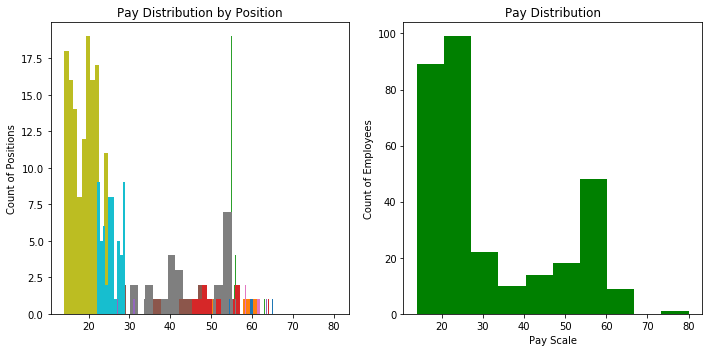

In [21]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
hr_data.groupby('position').pay_rate.plot(kind = 'hist')
plt.ylabel('Count of Positions')
plt.title('Pay Distribution by Position')


plt.subplot(1,2,2)
plt.hist(hr_data['pay_rate'], color ='green')
plt.xlabel('Pay Scale')
plt.ylabel('Count of Employees')
plt.title('Pay Distribution')

plt.tight_layout()
plt.show()



Those shapes look **awfully** similar, but the histogram on the left is a little hard to read. So in addition to this graph, let's create a bar graph of the variance in pay when grouped by position.

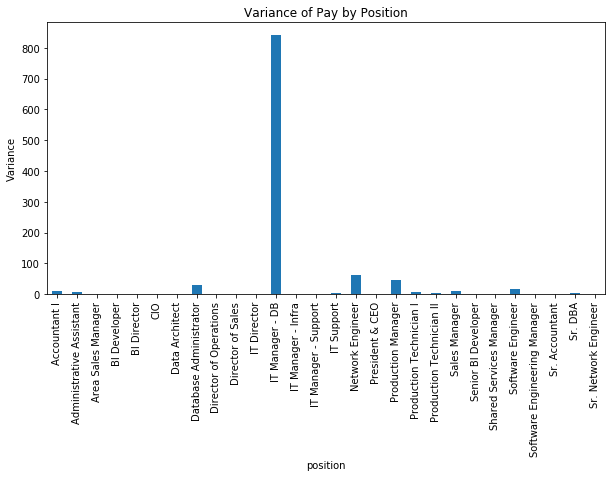

In [22]:
plt.figure(figsize=(10,5))
hr_data.groupby('position').pay_rate.var().plot(kind='bar')
plt.title('Variance of Pay by Position')
plt.ylabel('Variance')
plt.show()

It looks like we **might** have found something. Excluding the very large outlier, for the ***positions*** that have variance data, most of the variance disappears. Meaning within positions, **pay rate does not vary** all that much. More exploration needs to be done, there **appears** to be a relationship between the positions in the company and the pay distribution.


# Research Question

### Question: Is there a way to predict which employees will receive a performance review of ***exceptional***?

#  Data Science Techniques

#### - Clustering Analysis
#### - Association Analysis
#### - Regression Analysis
#### - Naive Bayes Classifiers